In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import voxart

In [3]:
test_vox2 = voxart.Design.from_size(7)
for i in [0, 6]:
    test_vox2.voxels[i, 0, :] = voxart.FILLED
    test_vox2.voxels[i, 6, :] = voxart.FILLED
    test_vox2.voxels[i, :, 0] = voxart.FILLED
    test_vox2.voxels[i, :, 6] = voxart.FILLED
for i in [6]:
    test_vox2.voxels[0, i, :] = voxart.FILLED
    test_vox2.voxels[6, i, :] = voxart.FILLED
    test_vox2.voxels[:, i, 0] = voxart.FILLED
    test_vox2.voxels[:, i, 6] = voxart.FILLED
display(test_vox2.voxels.sum())
test_vox2._voxels

116

array([[[2, 2, 2, 2, 2, 2, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 2, 2, 2, 2, 2, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


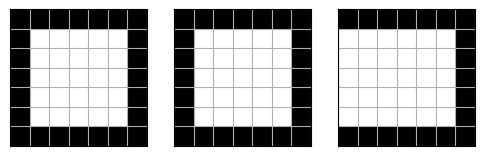

In [6]:
test_vox2.projections_fig()

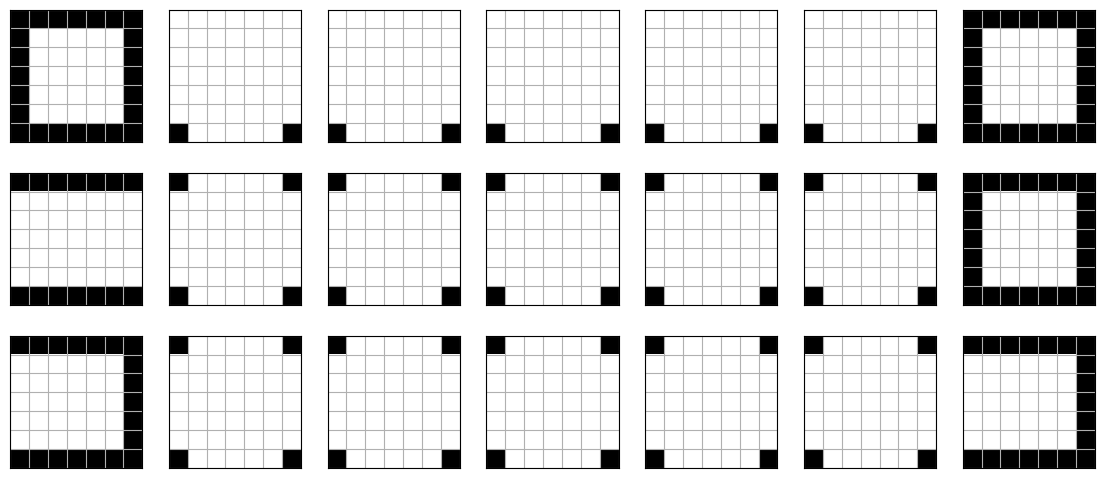

In [7]:
test_vox2.slices_fig()

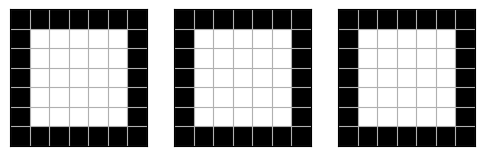

In [8]:
g = voxart.Goal.from_size(7)
g.add_frame()
g.fig()

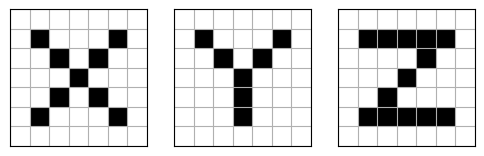

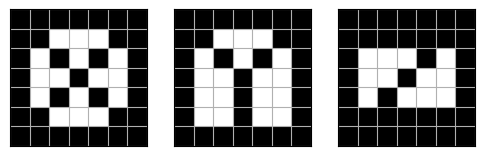

In [11]:
test_goal = voxart.Goal.from_arrays(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
)
display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())

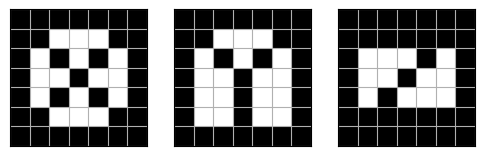

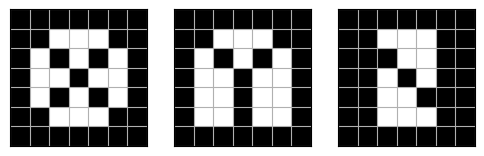

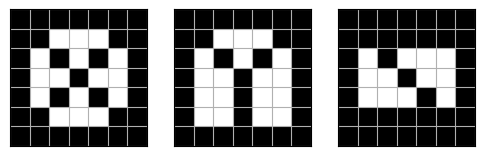

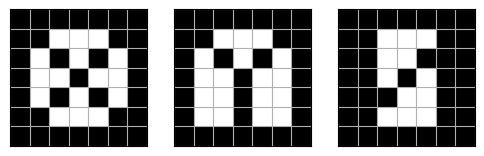

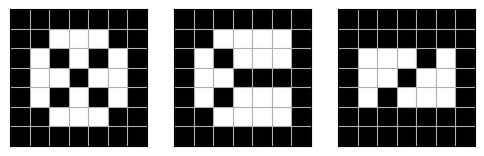

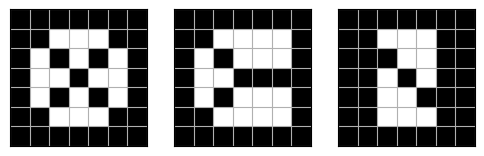

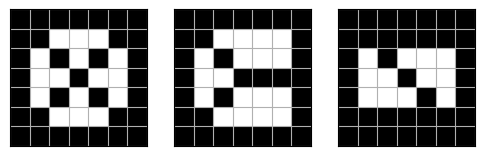

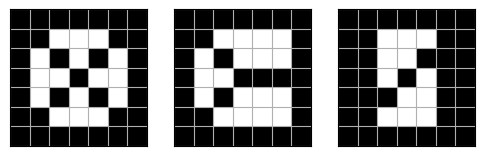

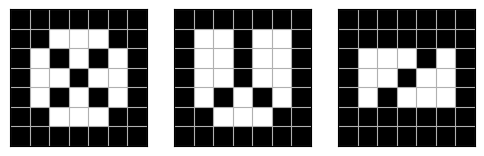

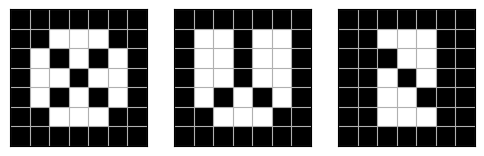

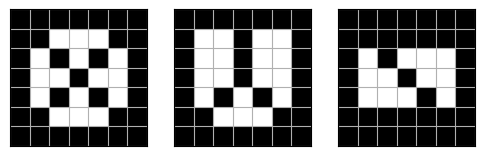

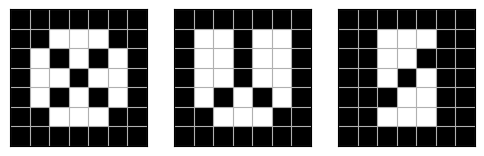

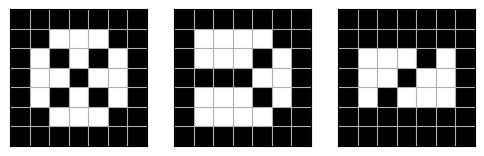

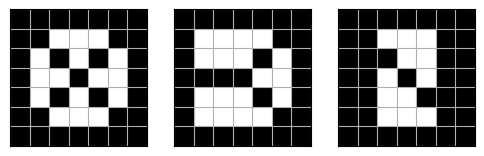

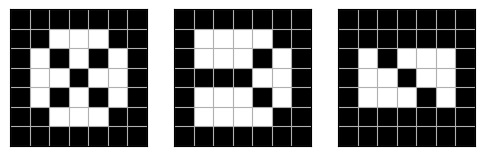

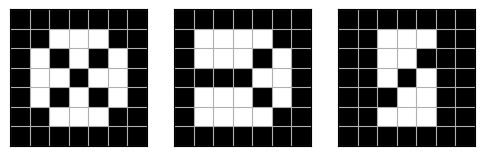

In [10]:
for g in test_goal.alternate_forms():
    display(g.fig())

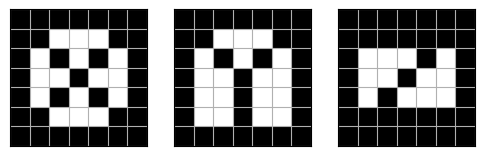

268

In [12]:
design = test_goal.create_base_design()
display(design.projections_fig())
display(design.voxels.sum())

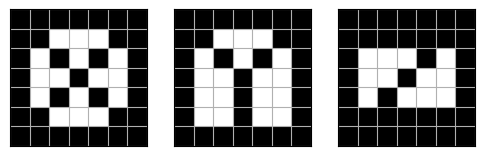

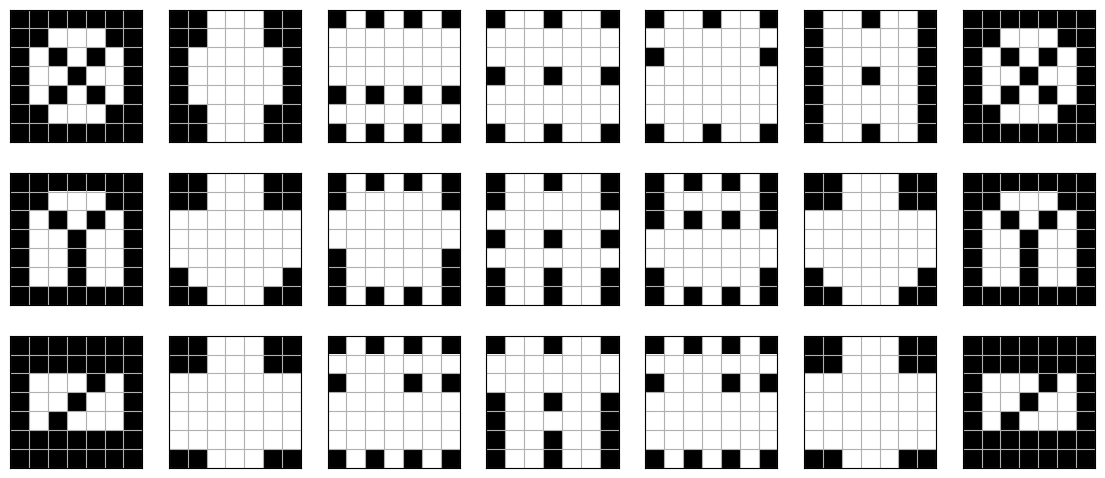

In [13]:
y, z = np.where(test_goal._goals[0] == 0)
design.voxels[:, y, z] = 0
x, z = np.where(test_goal._goals[1] == 0)
design.voxels[x, :, z] = 0
x, y = np.where(test_goal._goals[2] == 0)
design.voxels[x, y, :] = 0
display(design.projections_fig())
display(design.slices_fig())

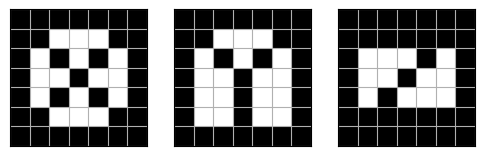

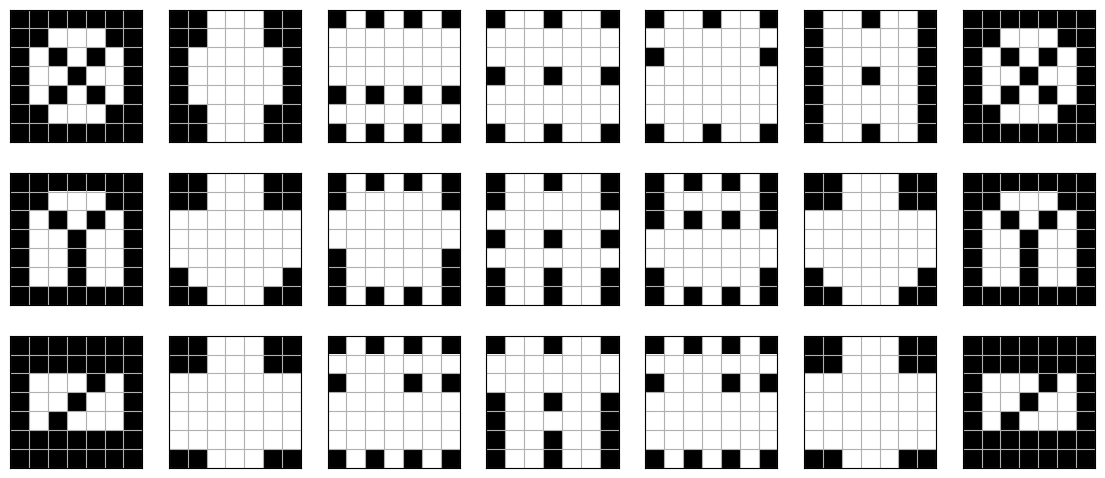

268

In [15]:
design2 = test_goal.create_base_design()
display(design2.projections_fig())
display(design2.slices_fig())
display(design2.voxels.sum())

In [16]:
voxart.Masks(4)

## find_removable

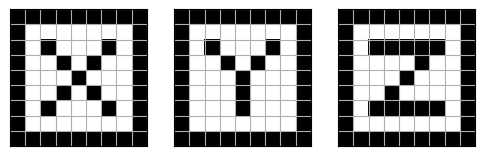

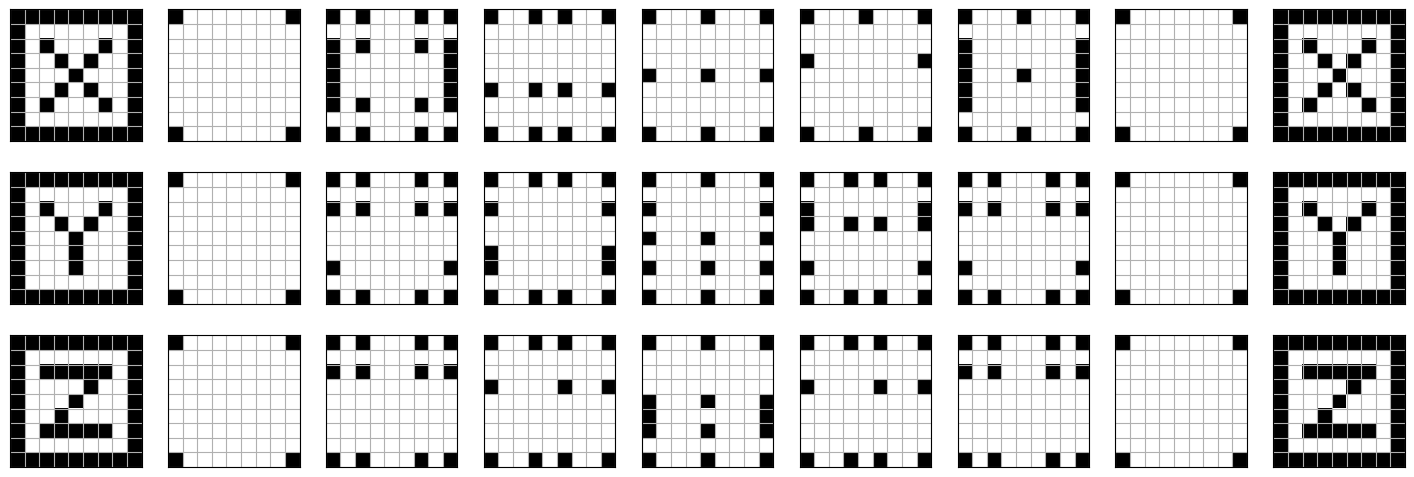

In [97]:
test_goal = voxart.Goal.from_arrays(
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0)
)
#display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())
design = test_goal.create_base_design()
display(design.slices_fig())

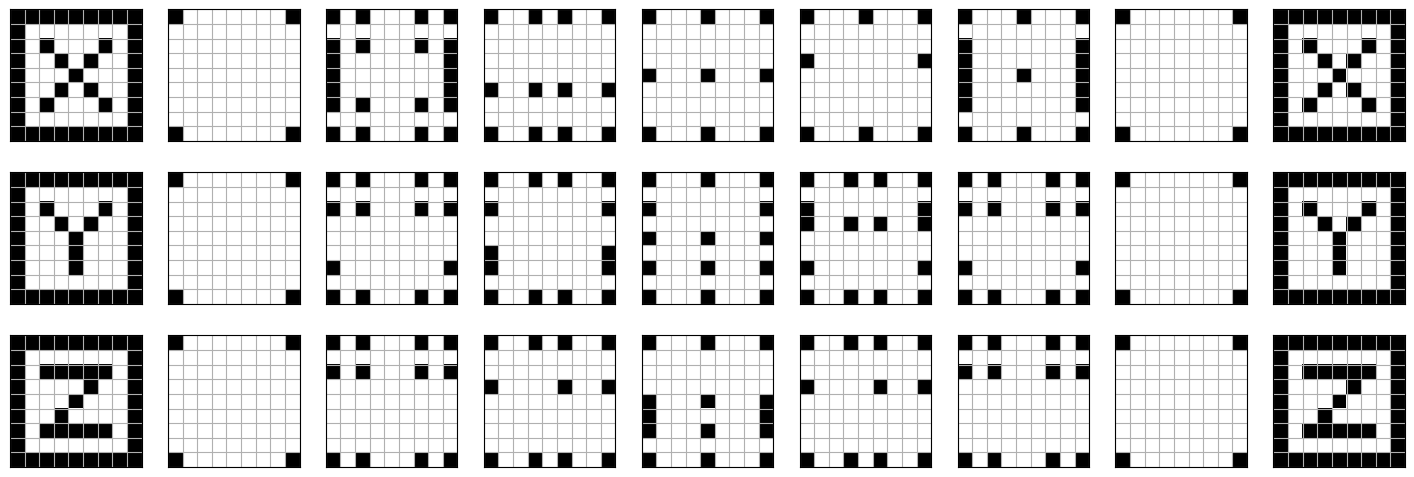

In [18]:
voxart.Design(design.find_removable_slow() * 2).slices_fig()

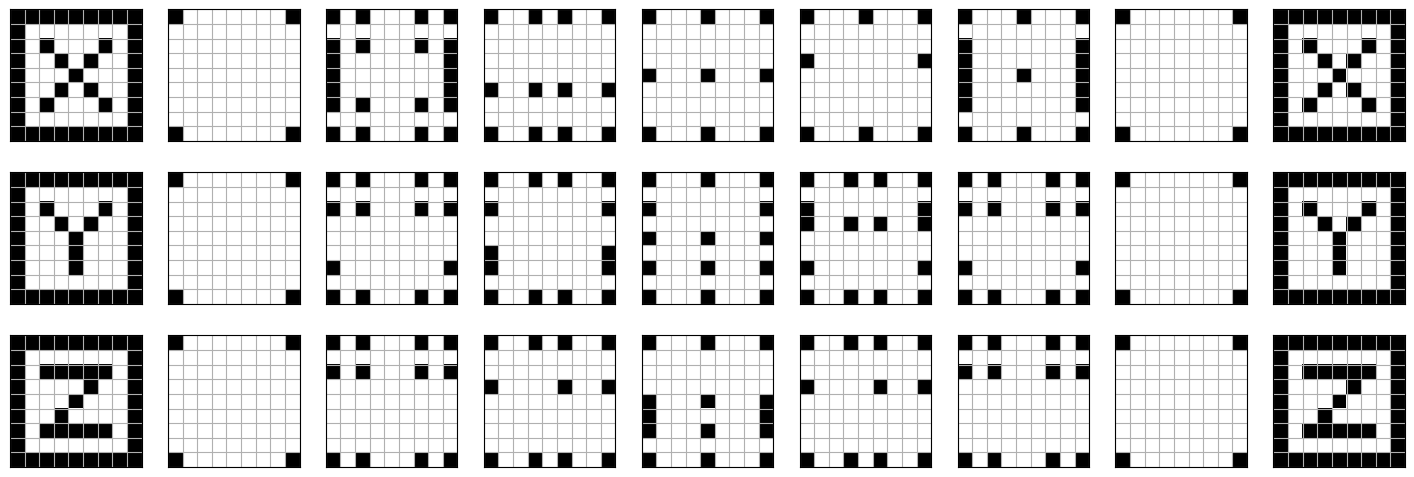

In [19]:
voxart.Design(design.find_removable() * 2).slices_fig()

## Search

Starting objective value: 153.0
Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15


,form_idx,is_starting,objective_value
160,14,False,37.0
168,15,False,26.5
96,8,False,35.5


form index: (5, False)
Value: 26.5


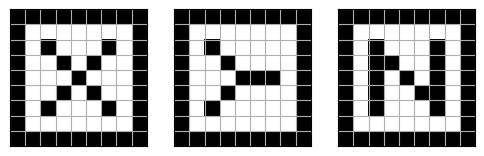

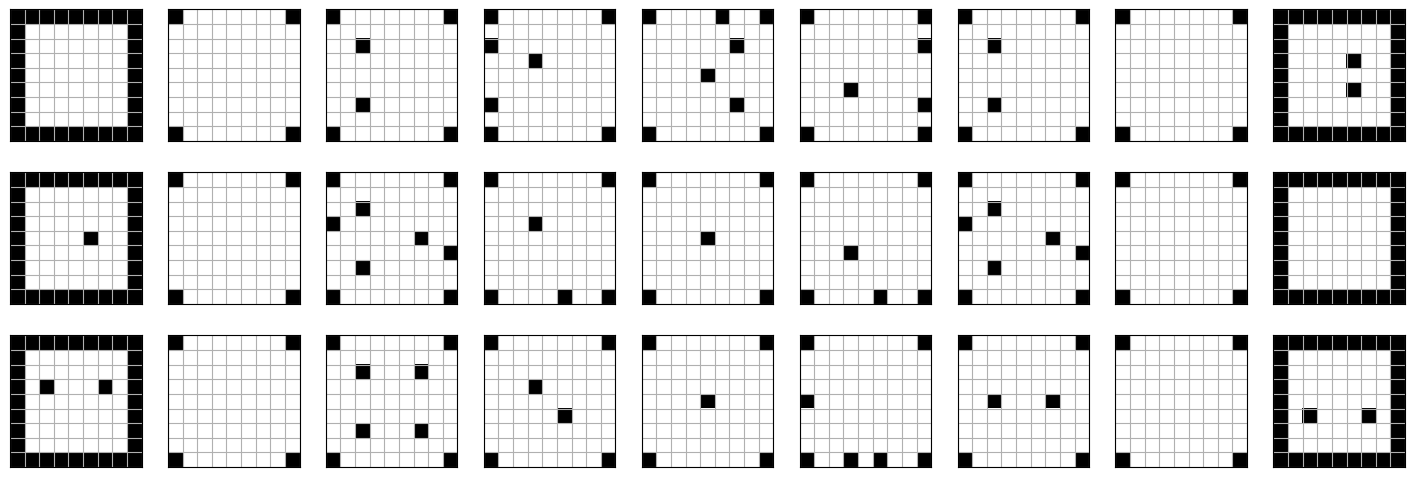

form index: (5, False)
Value: 26.5


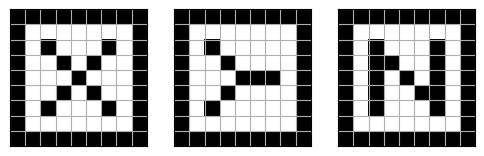

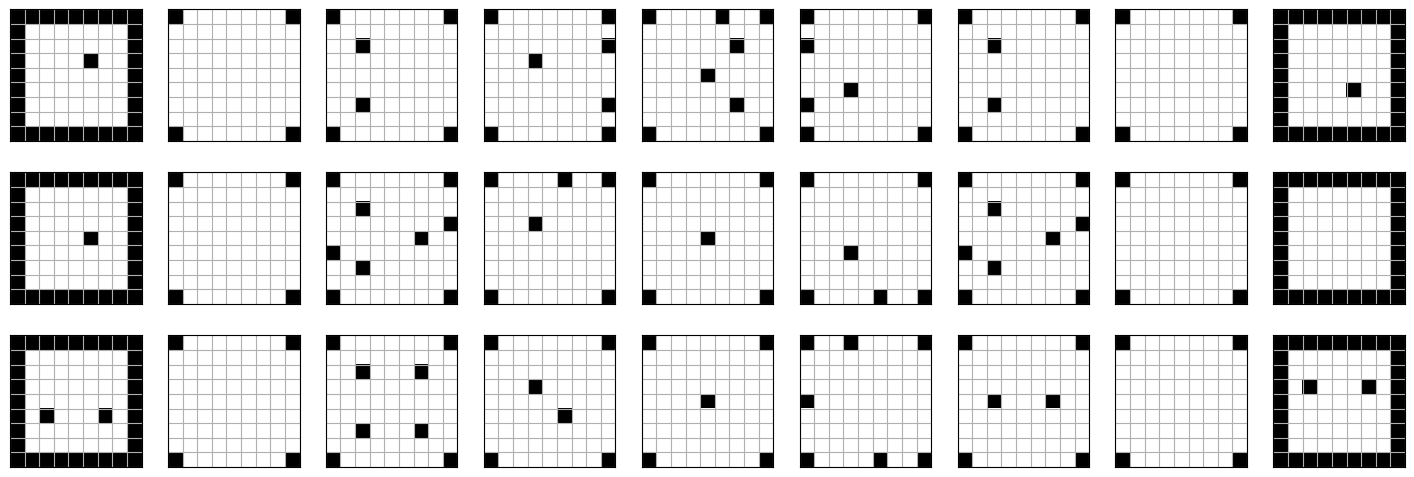

form index: (5, False)
Value: 26.5


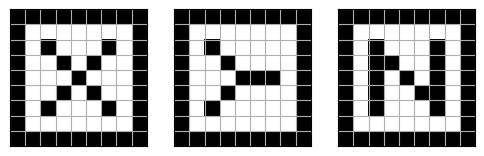

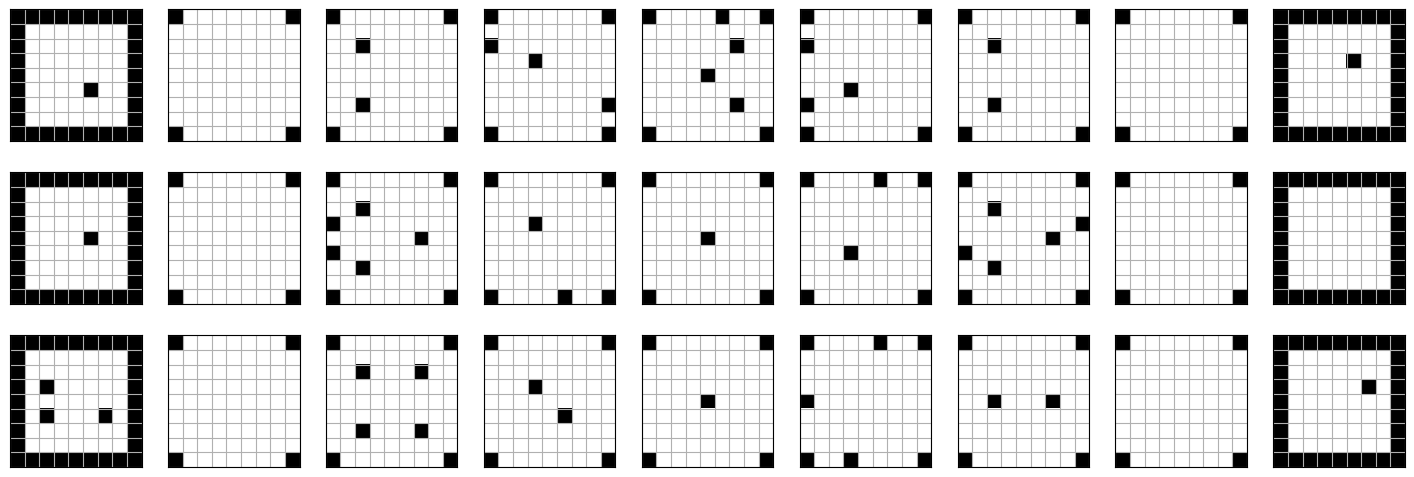

CPU times: user 7.6 s, sys: 564 ms, total: 8.17 s
Wall time: 6.76 s


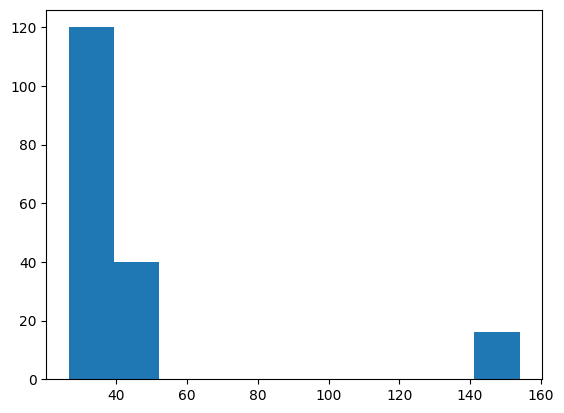

In [23]:
%%time
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
obj_func = voxart.ObjectiveFunction(masks=masks)
print("Starting objective value:", obj_func(base_design))
results = voxart.search(test_goal, "random_face_first", 10, 3)
df_results = results.all_objective_values(["form_idx", "is_starting"])
display(df_results.sample(3))
plt.hist(df_results["objective_value"])
for label, design in results.best():
    print("form index:", label)
    print("Value:", obj_func(design))
    display(design.projections_fig())
    display(design.slices_fig())

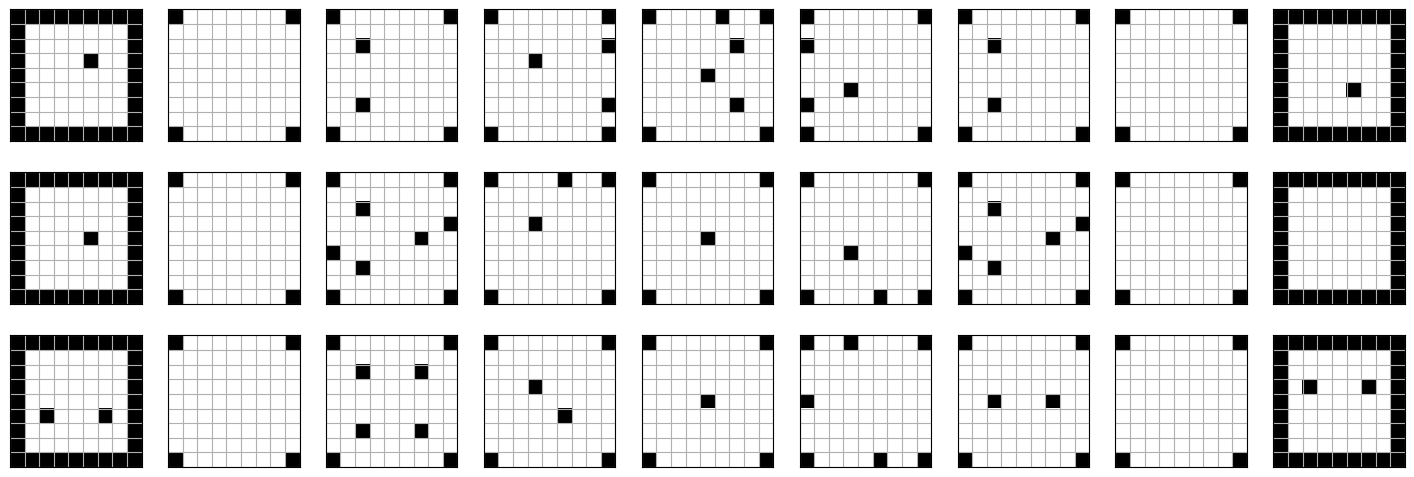

In [155]:
_, sparse_design = results.best()[1]
sparse_design.slices_fig()

## Looking at equality operations

In [24]:
goal0 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal1 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal2 = voxart.Goal.from_arrays([[1, 1], [1, 1]],
                                [[1, 0], [1, 1]],
                                [[0, 1], [1, 1]])
goal3 = voxart.Goal.from_arrays(np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0))
display(goal0 == goal1)
display(goal0 == goal2)
display(goal1 == goal2)
display(goal0 == goal3)

True

False

False

False

In [25]:
goal0._goals == goal3._goals

/var/folders/06/hmgfyb_d5076hlrrhyncy5vc0000gq/T/ipykernel_86435/2463477595.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  goal0._goals == goal3._goals


False

In [26]:
set([goal0, goal1, goal2, goal3])

{<voxart.Goal at 0x7fcf96e0b2b0>,
 <voxart.Goal at 0x7fcf96e15610>}

In [26]:
hash(goal0._goals.data.tobytes())

2096551961257740828

## Making a faster find_removable

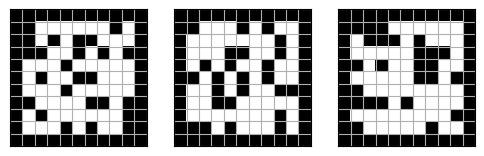

In [22]:
rng = np.random.default_rng()
goal_for_timing = voxart.Goal.from_arrays(
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)))
goal_for_timing.add_frame()
design_for_timing = goal_for_timing.create_base_design()
design_for_timing.projections_fig()
    

In [27]:
%timeit design_for_timing.find_removable_slow()

3.2 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
vox = design_for_timing.vox
display(np.sum(vox, axis=0))
display(np.sum(vox, axis=1))
display(np.sum(vox, axis=2))

array([[11,  5,  4,  3,  2,  4,  6,  3,  5,  4, 11],
       [ 9,  0,  0,  0,  2,  4,  0,  0,  0,  3,  9],
       [ 4,  0,  3,  0,  2,  0,  3,  0,  0,  2,  4],
       [ 4,  0,  2,  2,  0,  0,  0,  0,  0,  0,  4],
       [ 4,  0,  2,  0,  0,  2,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  2,  0,  2],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  2,  6],
       [ 4,  3,  0,  0,  0,  0,  2,  0,  0,  0,  4],
       [ 4,  0,  0,  0,  2,  0,  0,  0,  0,  2,  4],
       [ 4,  0,  2,  0,  0,  0,  3,  0,  0,  0,  4],
       [11,  5,  4,  3,  2,  4,  6,  3,  5,  4, 11]])

array([[11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  2,  0,  6],
       [ 3,  2,  0,  0,  0,  0,  2,  0,  0,  2,  3],
       [ 3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  0,  2,  2,  0,  3,  0,  2,  0,  0,  3],
       [ 4,  2,  0,  0,  0,  0,  2,  0,  0,  3,  4],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 7,  4,  3,  0,  0,  0,  0,  0,  2,  0,  7],
       [11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11]])

array([[11,  5,  6,  4,  4,  4,  4,  4,  4,  4, 11],
       [ 3,  2,  0,  2,  0,  0,  2,  0,  0,  3,  3],
       [ 3,  2,  3,  0,  2,  0,  2,  0,  0,  0,  3],
       [ 3,  2,  0,  0,  0,  0,  2,  2,  0,  2,  3],
       [ 5,  0,  0,  0,  2,  0,  0,  0,  0,  0,  5],
       [ 3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 5,  3,  0,  2,  0,  0,  0,  0,  0,  0,  5],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 5,  2,  3,  0,  0,  0,  3,  3,  2,  0,  5],
       [11,  5,  6,  4,  4,  4,  4,  4,  4,  4, 11]])

In [29]:
x = np.sum(vox, axis=1)
x

array([[11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  2,  0,  6],
       [ 3,  2,  0,  0,  0,  0,  2,  0,  0,  2,  3],
       [ 3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  0,  2,  2,  0,  3,  0,  2,  0,  0,  3],
       [ 4,  2,  0,  0,  0,  0,  2,  0,  0,  3,  4],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 7,  4,  3,  0,  0,  0,  0,  0,  2,  0,  7],
       [11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11]])

In [30]:
np.broadcast_to(np.expand_dims(x, axis=1), (11, 11, 11))

array([[[11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        ...,
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       ...,

       [[ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        ...,
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0

In [31]:
for ax in range(3):
    display(np.broadcast_to(np.expand_dims(np.sum(vox, axis=ax), axis=ax), (11, 11, 11)))

array([[[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       ...,

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4

array([[[11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        ...,
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       ...,

       [[ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        ...,
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0

array([[[11, 11, 11, ..., 11, 11, 11],
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 6,  6,  6, ...,  6,  6,  6],
        ...,
        [ 4,  4,  4, ...,  4,  4,  4],
        [ 4,  4,  4, ...,  4,  4,  4],
        [11, 11, 11, ..., 11, 11, 11]],

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3]],

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 3,  3,  3, ...,  3,  3,  3],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3,  3]],

       ...,

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3

Original design


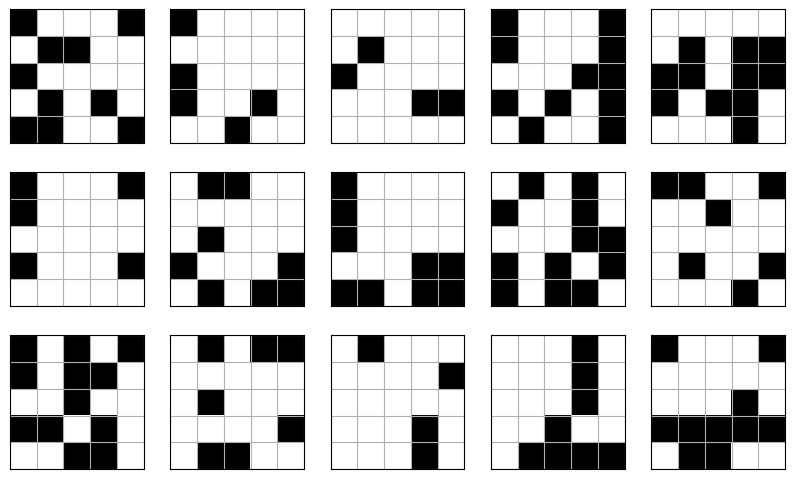

From slow process


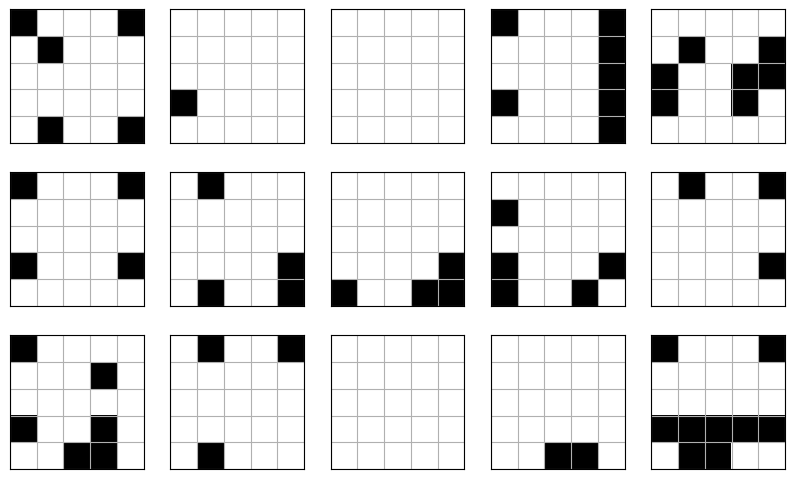

From fast process


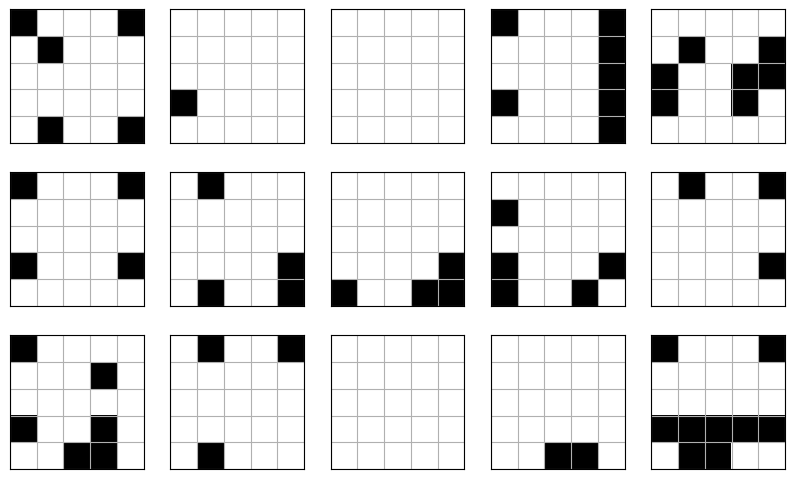

In [32]:
rng = np.random.default_rng(100)
size = 5
design = voxart.Design(rng.choice(a=[0, 1], p=[0.7, 0.3], size=(size, size, size)))
print("Original design")
display(design.slices_fig())
np.all(design.find_removable() == design.find_removable_slow())
print("From slow process")
display(voxart.Design(design.find_removable_slow()).slices_fig())
print("From fast process")
display(voxart.Design(design.find_removable()).slices_fig())

In [33]:
rng = np.random.default_rng(100)
size = 5
design = voxart.Design(rng.choice(a=[0, 1], p=[0.7, 0.3], size=(size, size, size)))
print("Original design")
display(design.voxels[0, :, :])
#display(design.slices_fig())
#np.all(design.find_removable() == design.find_removable_slow())
print("From slow process")
display(voxart.Design(design.find_removable_slow()).voxels[0, :, :])
print("From fast process")
display(voxart.Design(design.find_removable()).voxels[0, :, :])
#display(voxart.Design(design.find_removable()).slices_fig())
print("Sums array")
display(design._debug_sums)

Original design


array([[1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1]])

From slow process


array([[1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1]])

From fast process


array([[1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1]])

Sums array


AttributeError: 'Design' object has no attribute '_debug_sums'

In [36]:
%timeit design_for_timing.find_removable()

43.2 µs ± 607 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [51]:
help(np.load)

Help on function load in module numpy:

load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII', *, max_header_size=10000)
    Load arrays or pickled objects from ``.npy``, ``.npz`` or pickled files.
    
    .. warning:: Loading files that contain object arrays uses the ``pickle``
                 module, which is not secure against erroneous or maliciously
                 constructed data. Consider passing ``allow_pickle=False`` to
                 load data that is known not to contain object arrays for the
                 safer handling of untrusted sources.
    
    Parameters
    ----------
    file : file-like object, string, or pathlib.Path
        The file to read. File-like objects must support the
        ``seek()`` and ``read()`` methods and must always
        be opened in binary mode.  Pickled files require that the
        file-like object support the ``readline()`` method as well.
    mmap_mode : {None, 'r+', 'r', 'w+', 'c'}, optional
       

## Playing with image loading

In [52]:
import imageio

ModuleNotFoundError: No module named 'imageio'

In [39]:
from PIL import Image

In [55]:
img = Image.open("/usr/share/httpd/icons/small/binary.png")
x = np.array(img)
display(x.shape)
display(x)

(16, 16)

array([[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192,
        192, 192, 192],
       [192, 192, 192, 192, 192, 192, 192, 192, 140, 192, 192, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 231, 140, 192, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 255, 231, 140, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 206, 206, 192, 140, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 255,  57,  57,  57,  57, 192,
        192, 192, 192],
       [206, 255, 192, 107, 231, 206, 107, 206, 255, 192, 192, 107, 192,
        192, 192, 192],
       [206, 255, 107, 231, 140, 107, 255, 107, 255, 255, 231, 107, 192,
        192, 192, 192],
       [206, 255, 107, 255, 107, 107, 255, 107, 255, 255, 255, 107, 192,
        192, 192, 192],
       [206, 255, 140, 107, 231, 192, 107, 192, 255, 255, 255, 107, 192,
        192, 192, 192],
       [206, 255, 192, 107, 23

In [57]:
dir(img)

['_Image__transformer',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_fp',
 '_get_safe_box',
 '_getexif',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_png_',
 '_repr_pretty_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'cus

In [59]:
img.info

{'transparency': 192}

In [30]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [29]:
test_goal._goals.flat(axis=0)

TypeError: flatten() got an unexpected keyword argument 'axis'

In [32]:
test_goal._goals.shape

(3, 9, 9)

In [60]:
np.reshape(test_goal._goals, (27, 9))

array([[255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 

In [73]:
def to_image(self):
    sz = self.size
    out = np.reshape(self._goals, (3 * sz, sz)).astype(np.uint8)
    out[np.where(out == voxart.EMPTY)] = 255
    out[np.where(out == voxart.FILLED)] = 0
    return Image.fromarray(out, mode='L')

to_image(test_goal)


In [84]:
img = to_image(test_goal)
img.save("/Users/priley/tmp/goal.png")
img

In [85]:
img2 = Image.open("/Users/priley/tmp/goal.png")
img2

In [88]:
np.array(img2.convert(mode="L"))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255,   0, 255, 255, 255,   0, 255,   0],
       [  0, 255, 255,   0, 255,   0, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255,   0, 255,   0, 255, 255,   0],
       [  0, 255,   0, 255, 255, 255,   0, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255,   0, 255, 255, 255,   0, 255,   0],
       [  0, 255, 255,   0, 255,   0, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 

In [93]:
def from_image(img):
    arr = np.array(img.convert(mode="L"))
    arr[np.where(arr < 128)] = voxart.FILLED
    arr[np.where(arr >= 128)] = voxart.EMPTY
    
    sz = arr.shape[1]
    return voxart.Goal(arr.reshape((3, sz, sz)))

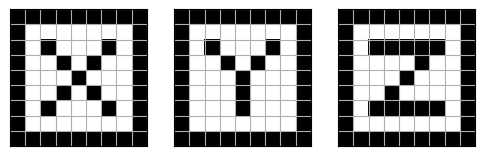

In [95]:
from_image(Image.open("/Users/priley/tmp/goal.png")).fig()

In [79]:
dir(img2)

['_Image__transformer',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_fp',
 '_get_safe_box',
 '_getexif',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_png_',
 '_repr_pretty_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'cus

In [98]:
test_goal.to_image().save("/tmp")

In [101]:
Image.Image

PIL.Image.Image

# Playing with things for the connectors

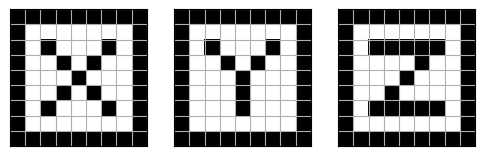

In [32]:
design = test_goal.create_base_design()
masks = voxart.Masks(design)
design.projections_fig()


In [38]:
[(x, y, z) for x, y, z in zip(*np.where(masks.edges))]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 8),
 (1, 8, 0),
 (1, 8, 8),
 (2, 0, 0),
 (2, 0, 8),
 (2, 8, 0),
 (2, 8, 8),
 (3, 0, 0),
 (3, 0, 8),
 (3, 8, 0),
 (3, 8, 8),
 (4, 0, 0),
 (4, 0, 8),
 (4, 8, 0),
 (4, 8, 8),
 (5, 0, 0),
 (5, 0, 8),
 (5, 8, 0),
 (5, 8, 8),
 (6, 0, 0),
 (6, 0, 8),
 (6, 8, 0),
 (6, 8, 8),
 (7, 0, 0),
 (7, 0, 8),
 (7, 8, 0),
 (7, 8, 8),
 (8, 0, 0),
 (8, 0, 1),
 (8, 0, 2),
 (8, 0, 3),
 (8, 0, 4),
 (8, 0, 5),
 (8, 0, 6),
 (8, 0, 7),
 (8, 0, 8),
 (8, 1, 0),
 (8, 1, 8),
 (8, 2, 0),
 (8, 2, 8),
 (8, 3, 0),
 (8, 3, 8),
 (8, 4, 0),
 (8, 4, 8),
 (8, 5, 0),
 (8, 5, 8),
 (8, 6, 0),
 (8, 6, 8),
 (8, 7, 0),
 (8, 7, 8),
 (8,

In [58]:
target, dist, path = voxart.get_shortest_path_to_targets(design, masks, targets={(1, 1, 1)})
assert target == (1, 1, 1)
display(dist)
for v in path:
    print(v, masks.edges[v])

2

(1, 1, 0) False
(1, 0, 0) True
(0, 0, 0) True
(0, 0, 1) True
(0, 0, 2) True
(0, 0, 3) True
(0, 0, 4) True
(0, 0, 5) True
(0, 0, 6) True
(0, 0, 7) True
(0, 0, 8) True
(0, 1, 8) True
(0, 2, 8) True
(0, 3, 8) True
(0, 4, 8) True
(0, 5, 8) True
(0, 6, 8) True
(0, 7, 8) True


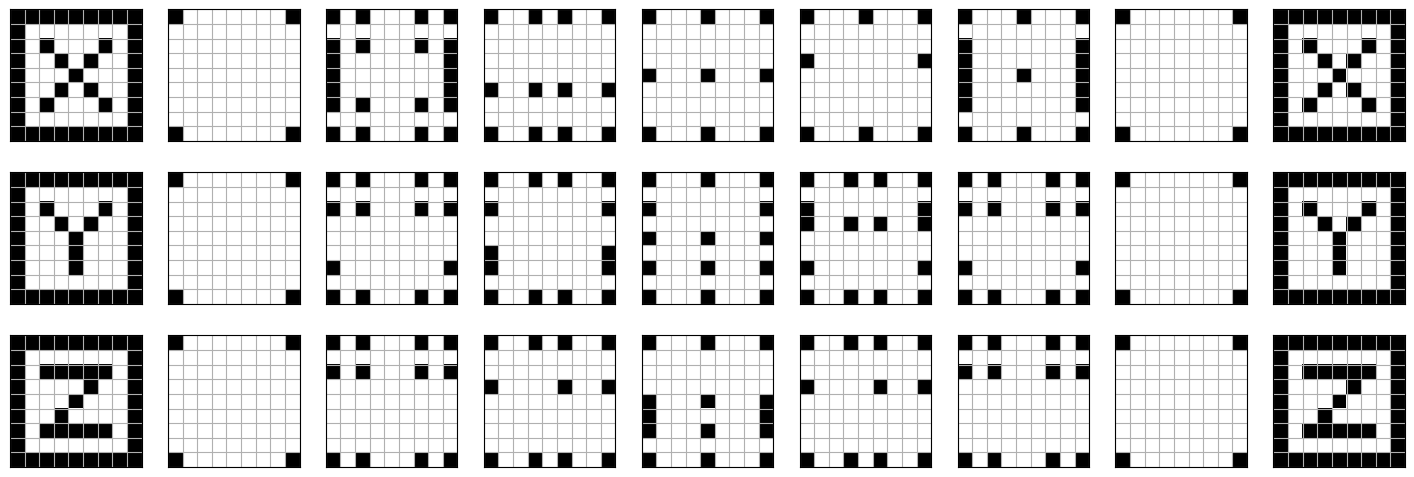

In [60]:
design.slices_fig()

4

(2, 2, 4) False
(2, 2, 3) False
(2, 2, 2) False
(2, 2, 1) False
(2, 2, 0) False
(2, 3, 0) False
(2, 4, 0) False
(2, 5, 0) False
(1, 5, 0) False


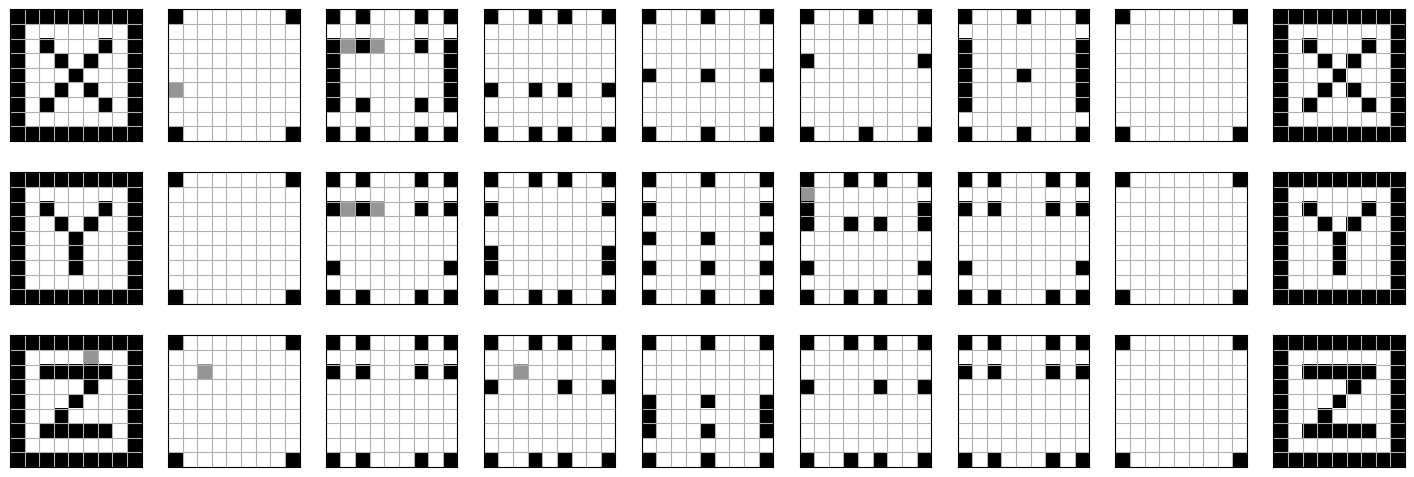

In [71]:
design = test_goal.create_base_design()
target, dist, path = voxart.get_shortest_path_to_targets(design, masks, targets={(2, 2, 4)})
assert target == (2, 2, 4)
display(dist)
for v in itertools.chain([target], path):
    print(v, masks.edges[v])
voxart.add_path_as_connectors(design, path)
design.slices_fig()

## Trying out the design with connectors

  0%|          | 0/16 [00:00<?, ?it/s]

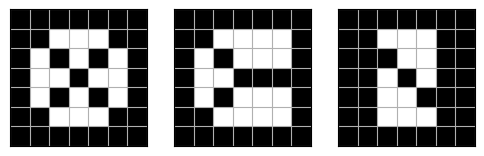

  0%|          | 0/200 [00:00<?, ?it/s]

,iter_idx,num_connectors,objective_value
30,30,14,69.0
89,89,13,68.0
138,138,14,69.0


iter_idx: (3, 13), value: 68.0, num_filled: 84, num_conn: 13


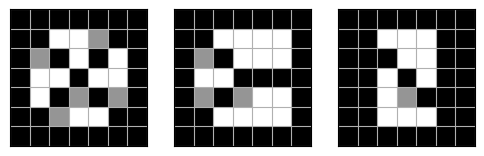

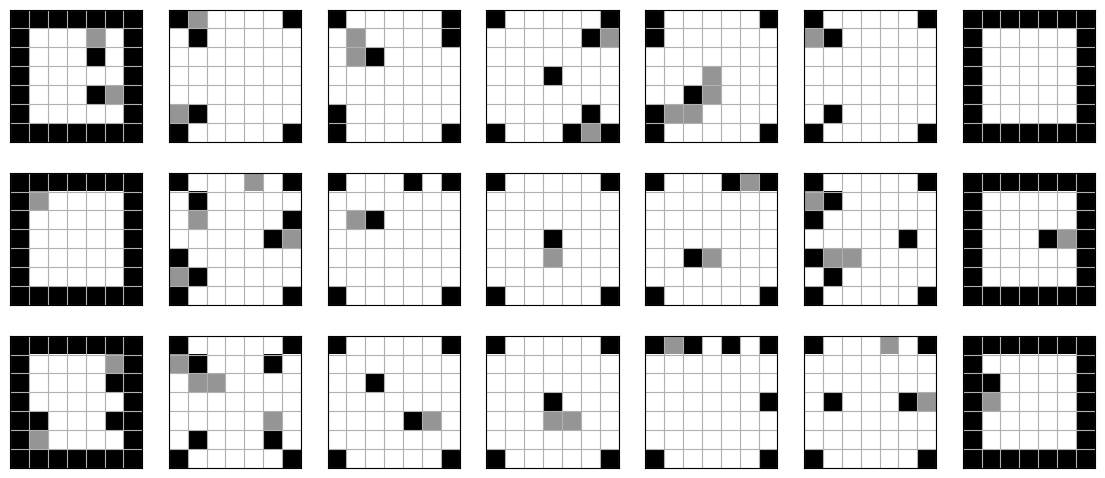

iter_idx: (5, 13), value: 68.0, num_filled: 84, num_conn: 13


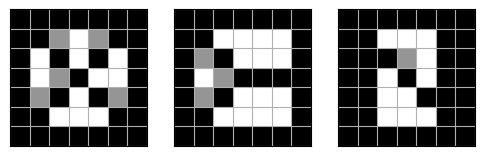

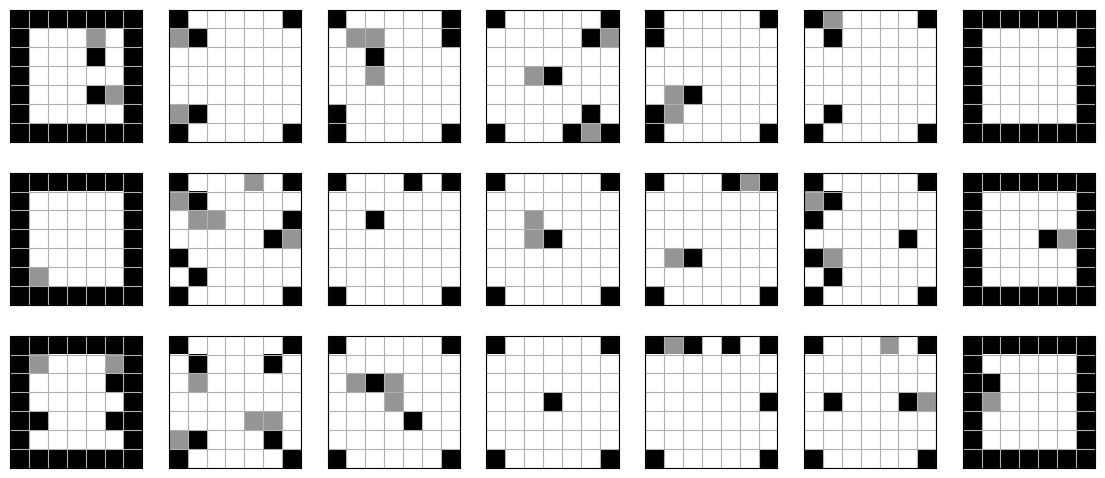

iter_idx: (15, 13), value: 68.0, num_filled: 84, num_conn: 13


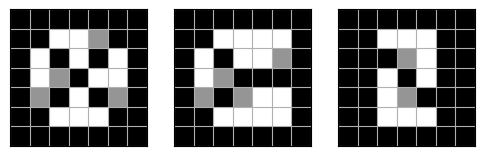

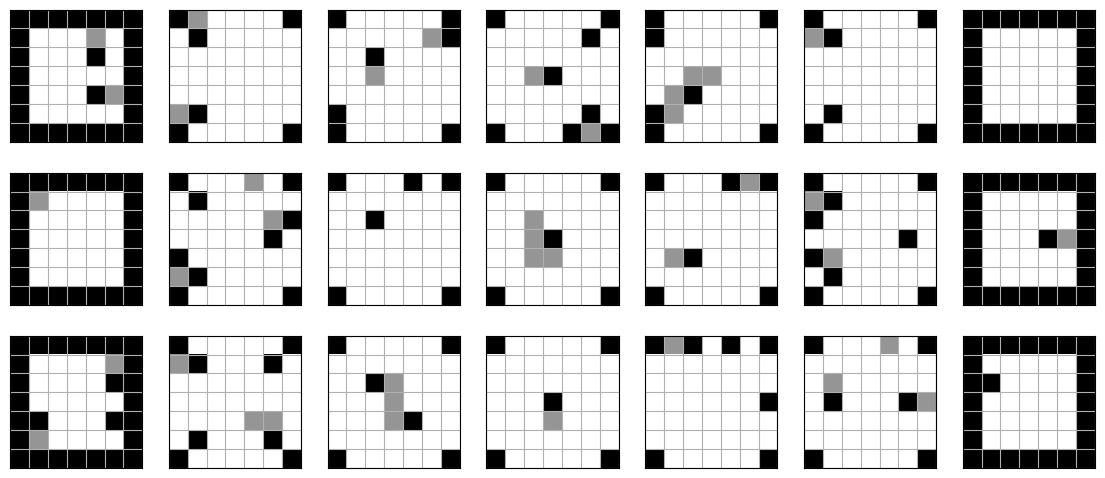

CPU times: user 18.2 s, sys: 5.56 s, total: 23.8 s
Wall time: 17.7 s


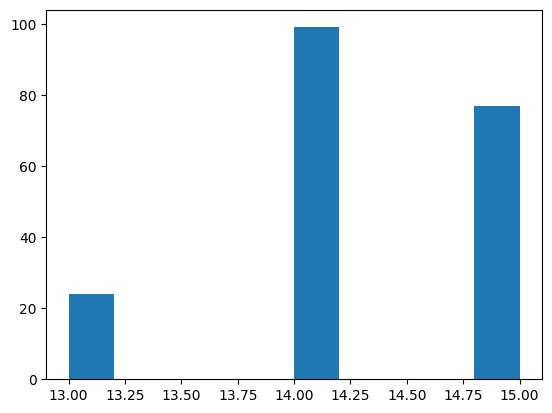

In [14]:
%%time
base_design = test_goal.create_base_design()
stage1_results = voxart.search(test_goal, "random_face_first", 10, 3)
_, unconnected_design = stage1_results.best()[0]
display(unconnected_design.projections_fig())
obj_func = voxart.ObjectiveFunction()
stage2_results = voxart.search_connectors(unconnected_design, 200, 3, obj_func)
df_results = stage2_results.all_objective_values(["iter_idx", "num_connectors"])
display(df_results.sample(3))
plt.hist(df_results["num_connectors"])
for label, design in stage2_results.best():
    print(f"iter_idx: {label}, value: {obj_func(design)}, num_filled: {design.num_filled()}, num_conn: {design.num_connectors()}")
    display(design.projections_fig())
    display(design.slices_fig())

In [127]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

# Playing with numpy-stl

In [102]:
import stl

In [105]:
data = np.zeros(6, dtype=stl.mesh.Mesh.dtype)
data

array([([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0])],
      dtype=[('normals', '<f4', (3,)), ('vectors', '<f4', (3, 3)), ('attr', '<u2', (1,))])

In [106]:
data['normals']

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [107]:
data['vectors']

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [108]:
# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = stl.mesh.Mesh(np.zeros(faces.shape[0], dtype=stl.mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

In [114]:
from mpl_toolkits import mplot3d
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(cube.vectors))

# Auto scale to the mesh size
scale = cube.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
#plt.show()
#

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [116]:
a = np.array([1, 2, 3], dtype=int)
a

array([1, 2, 3])

In [124]:
a.flags.writeable = False
hash(a)

TypeError: unhashable type: 'numpy.ndarray'

In [131]:
list(voxart.vox_to_triangles((0, 1, 2)))

[array([[0, 1, 2],
        [1, 1, 2],
        [0, 2, 2]]),
 array([[1, 2, 2],
        [1, 1, 2],
        [0, 2, 2]]),
 array([[0, 1, 3],
        [1, 1, 3],
        [0, 2, 3]]),
 array([[1, 2, 3],
        [1, 1, 3],
        [0, 2, 3]]),
 array([[0, 1, 2],
        [0, 1, 3],
        [1, 1, 2]]),
 array([[1, 1, 3],
        [0, 1, 3],
        [1, 1, 2]]),
 array([[0, 2, 2],
        [0, 2, 3],
        [1, 2, 2]]),
 array([[1, 2, 3],
        [0, 2, 3],
        [1, 2, 2]]),
 array([[0, 1, 2],
        [0, 1, 3],
        [0, 2, 2]]),
 array([[0, 2, 3],
        [0, 1, 3],
        [0, 2, 2]]),
 array([[1, 1, 2],
        [1, 1, 3],
        [1, 2, 2]]),
 array([[1, 2, 3],
        [1, 1, 3],
        [1, 2, 2]])]

In [150]:
vox_stl = stl.mesh.Mesh(np.zeros(12, dtype=stl.mesh.Mesh.dtype))
for i, tri in enumerate(voxart.vox_to_triangles((0, 0, 0))):
    print(i)
    for j in range(3):
        print(tri[j])
        vox_stl.vectors[i][j] = tri[j]
display(vox_stl)
vox_stl.save("/Users/priley/tmp/vox.stl", mode=stl.Mode.ASCII)

0
[0 0 0]
[0 1 0]
[1 0 0]
1
[1 1 0]
[1 0 0]
[0 1 0]
2
[0 0 1]
[1 0 1]
[0 1 1]
3
[1 1 1]
[0 1 1]
[1 0 1]
4
[0 0 0]
[1 0 0]
[0 0 1]
5
[1 0 1]
[0 0 1]
[1 0 0]
6
[0 1 0]
[0 1 1]
[1 1 0]
7
[1 1 1]
[1 1 0]
[0 1 1]
8
[0 0 0]
[0 0 1]
[0 1 0]
9
[0 1 1]
[0 1 0]
[0 0 1]
10
[1 0 0]
[1 1 0]
[1 0 1]
11
[1 1 1]
[1 0 1]
[1 1 0]


<Mesh: '' 12 vertices>

In [136]:
help(vox_stl.save)

Help on method save in module stl.stl:

save(filename, fh=None, mode=<Mode.AUTOMATIC: 0>, update_normals=True) method of stl.mesh.Mesh instance
    Save the STL to a (binary) file
    
    If mode is :py:data:`AUTOMATIC` an :py:data:`ASCII` file will be
    written if the output is a TTY and a :py:data:`BINARY` file otherwise.
    
    :param str filename: The file to load
    :param file fh: The file handle to open
    :param int mode: The mode to write, default is :py:data:`AUTOMATIC`.
    :param bool update_normals: Whether to update the normals



In [143]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

In [152]:
def vox_to_stl(vox):
    out = stl.mesh.Mesh(np.zeros(12, dtype=stl.mesh.Mesh.dtype))
    for i, tri in enumerate(voxart.vox_to_triangles(vox)):
        for j in range(3):
            out.vectors[i][j] = tri[j]
    return out

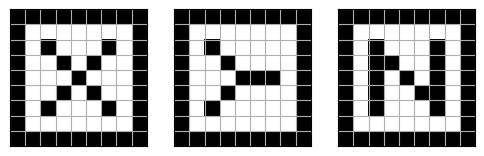

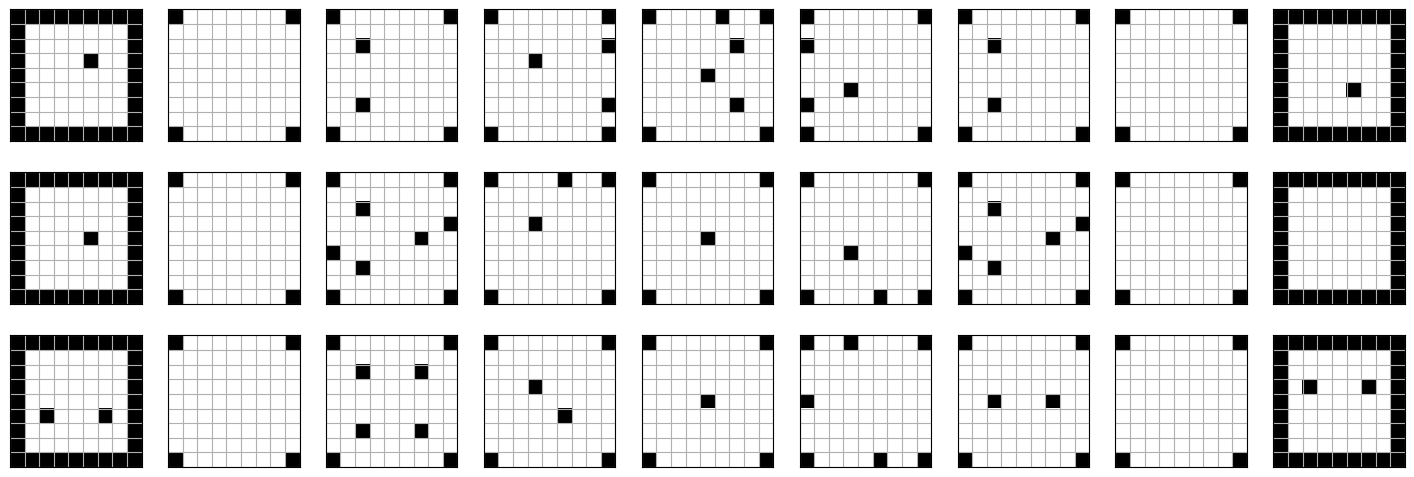

In [158]:
display(sparse_design.projections_fig())
sparse_design.slices_fig()

In [162]:
meshes = []
for vox in zip(*np.where(sparse_design.voxels == voxart.FILLED)):
    meshes.append(vox_to_stl(vox))
sparse_design_stl = stl.mesh.Mesh(np.concatenate([m.data for m in meshes]))
display(sparse_design_stl)
sparse_design_stl.save("/Users/priley/tmp/test_design.stl", mode=stl.Mode.ASCII)

<Mesh: '' 1296 vertices>

In [164]:
v = voxart.Design(sparse_design.voxels)
v

In [165]:
v.voxels

array([[[2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 2, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2]],

       [[2, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 2]],

       [[2, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 2

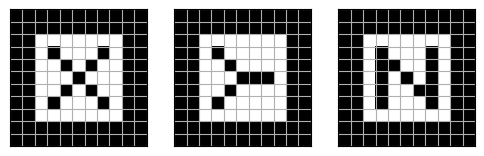

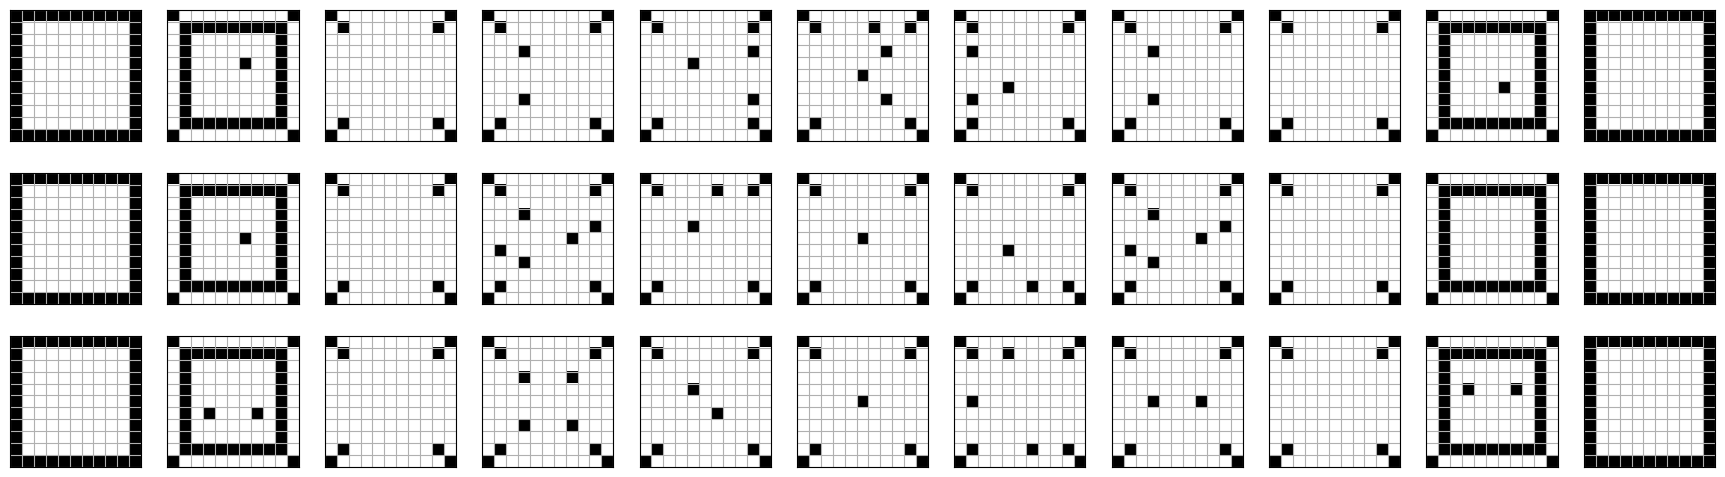

In [176]:
v2 = voxart.Design(np.pad(v.voxels, pad_width=1, constant_values=voxart.EMPTY))
v2.voxels[0, (0, -1), :] = voxart.FILLED
v2.voxels[-1, (0, -1), :] = voxart.FILLED
v2.voxels[0, :, (0, -1)] = voxart.FILLED
v2.voxels[-1, :, (0, -1)] = voxart.FILLED
v2.voxels[:, (0, -1), 0] = voxart.FILLED
v2.voxels[:, (0, -1), -1] = voxart.FILLED
#v2.voxels[(0, -1), :, (0, -1)] = voxart.FILLED
#v2.voxels[:, (0, -1), (0, -1)] = voxart.FILLED
display(v2.projections_fig())
display(v2.slices_fig())

In [177]:
meshes = []
for vox in zip(*np.where(v2.voxels == voxart.FILLED)):
    meshes.append(vox_to_stl(vox))
sparse_design_stl = stl.mesh.Mesh(np.concatenate([m.data for m in meshes]))
display(sparse_design_stl)
sparse_design_stl.save("/Users/priley/tmp/test_design_v2.stl", mode=stl.Mode.ASCII)

<Mesh: '' 2688 vertices>

# Playing with more spacing

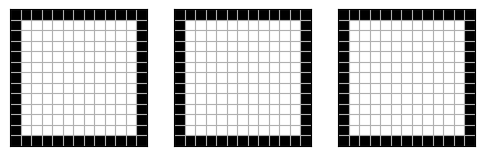

In [179]:
goal13 = voxart.Goal.from_size(13)
goal13.add_frame()
display(goal13.fig())
goal13.to_image().save("empty13.png")

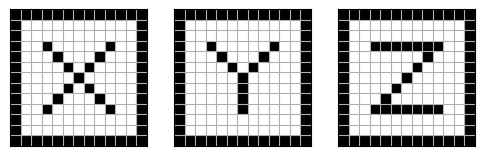

In [181]:
goal_xyz = voxart.Goal.from_image(Image.open("../assets/xyz_13.png"))
goal_xyz.fig()

Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15
search_connectors: completed 0
search_connectors: completed 1
search_connectors: completed 2
search_connectors: completed 3
search_connectors: completed 4
search_connectors: completed 5
search_connectors: completed 6
search_connectors: completed 7
search_connectors: completed 8
search_connectors: completed 9
search_connectors: completed 10
search_connectors: completed 11
search_connectors: completed 12
search_connectors: completed 13
search_connectors: completed 14
search_connectors: completed 15
search_connectors: completed 16
search_connectors: completed 17
search_connectors: completed 18
search_connectors: completed 19


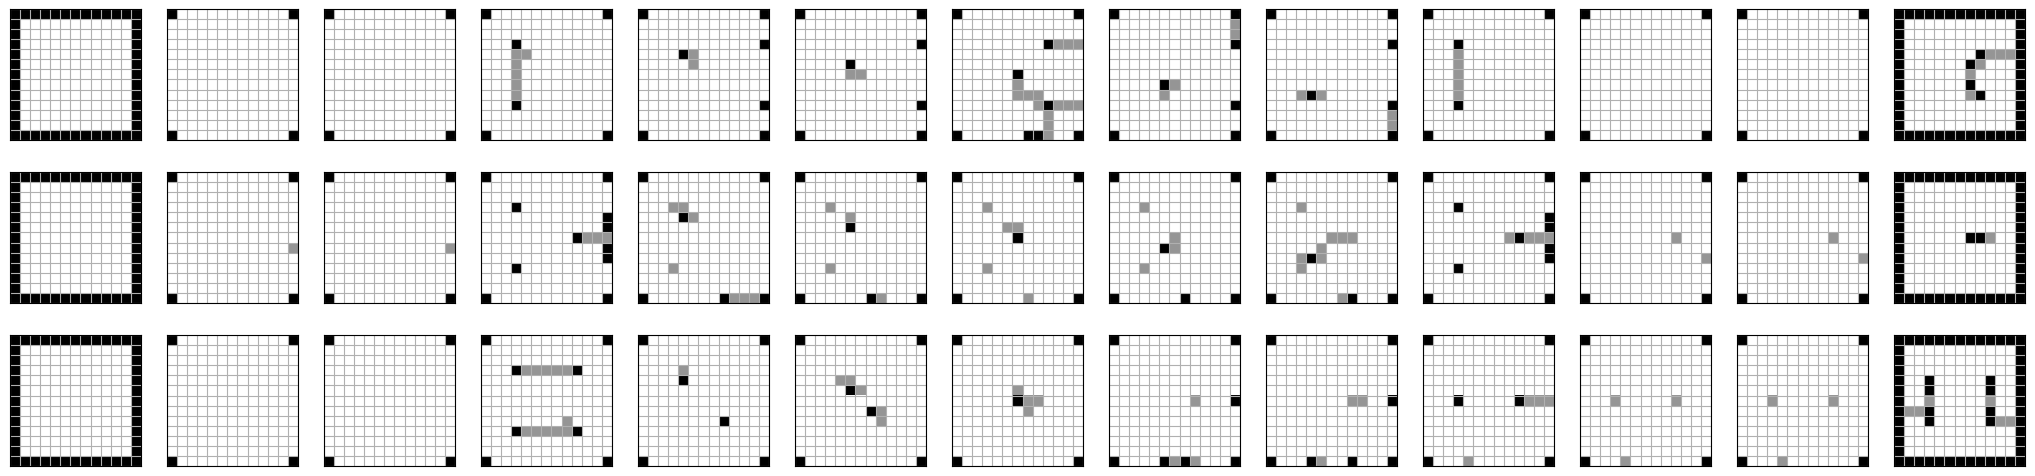

In [244]:
results_filled = voxart.search(goal_xyz, "random_clear_front", num_iterations=50, top_n=1)
_, design_xyz = results_filled.best()[0]
results_conn = voxart.search_connectors(design_xyz, num_iterations=20, top_n=1)
_, design_xyz_conn = results_conn.best()[0]
display(design_xyz_conn.slices_fig())


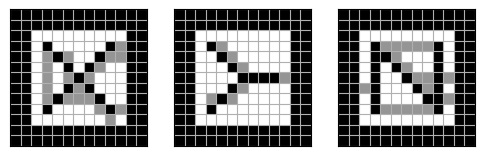

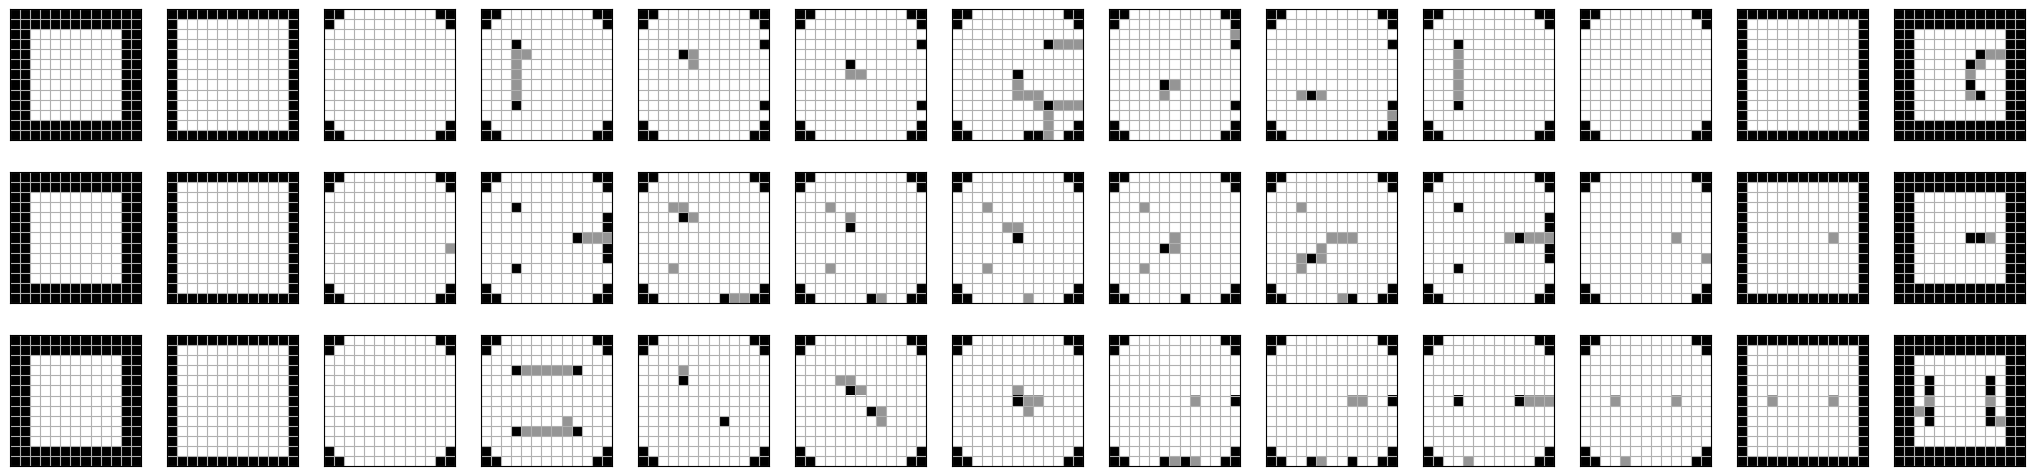

In [245]:
design_xyz_conn.add_frame(1)
display(design_xyz_conn.projections_fig())
display(design_xyz_conn.slices_fig())

In [247]:
voxart.save_stl_pair(design_xyz_conn, "/Users/priley/tmp/xyz_v3")

# add_frame

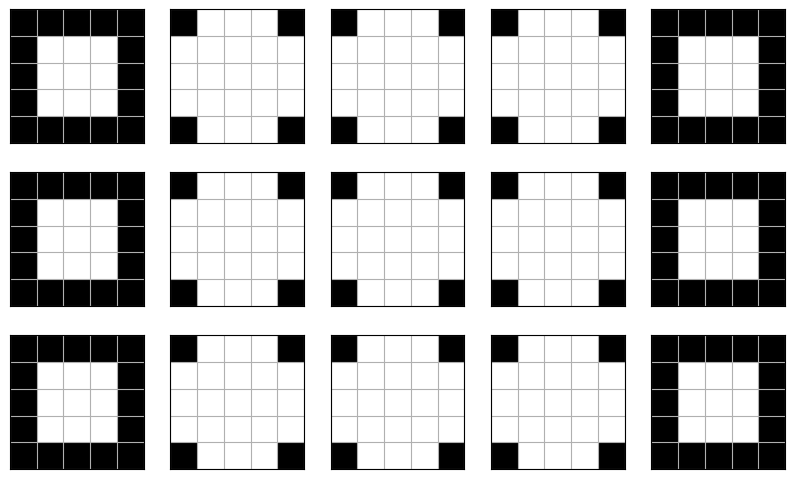

In [238]:
d = voxart.Design.from_size(5)
d.add_frame(offset=0)
d.slices_fig()

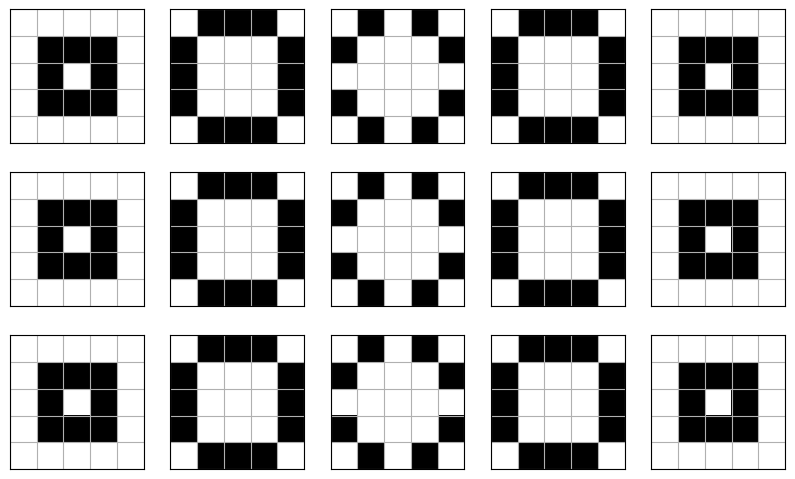

In [239]:
d = voxart.Design.from_size(5)
d.add_frame(offset=1)
d.slices_fig()

In [235]:
help(list.insert)

Help on method_descriptor:

insert(self, index, object, /)
    Insert object before index.



# Looking at goal_locations

In [7]:
goal_pfr = voxart.Goal.from_image(Image.open("../assets/pfr_13.png"))
goal_pfr.fig()
results = voxart.search(goal_pfr, "random_clear_front", num_iterations=50, top_n=50)
for i, (label, design) in enumerate(results.best()):
    print(design.goal_locations)
    if design.goal_locations != [0, 0, 0]:
        print(i)
        print(label)
        display(design.projections_fig())

  0%|          | 0/64 [00:00<?, ?it/s]

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


  0%|          | 0/50 [00:00<?, ?it/s]

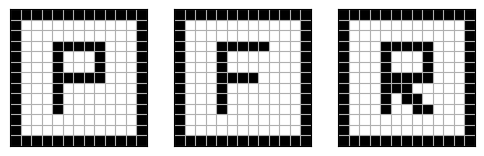

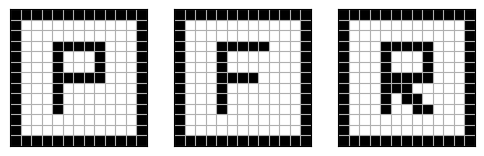

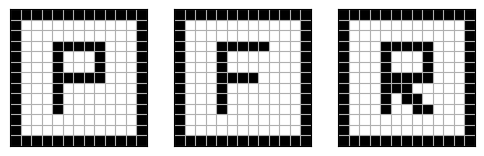

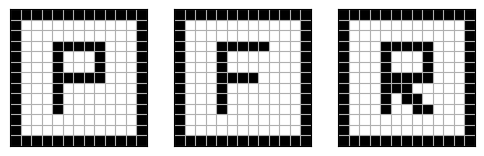

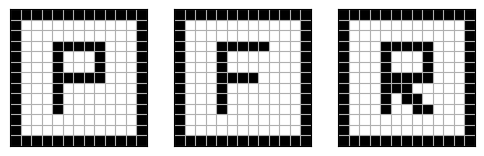

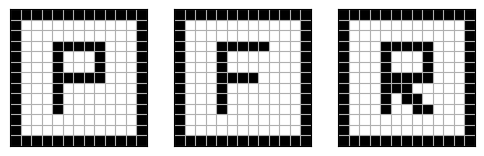

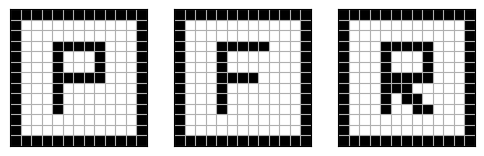

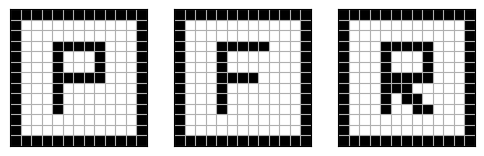

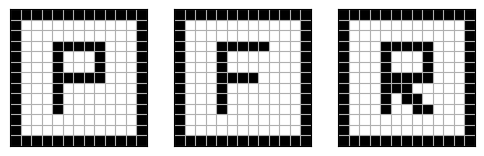

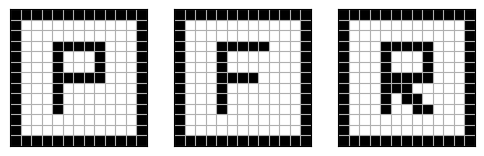

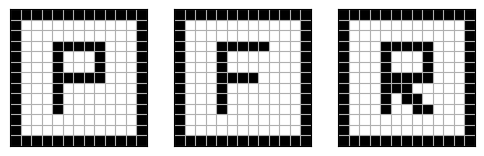

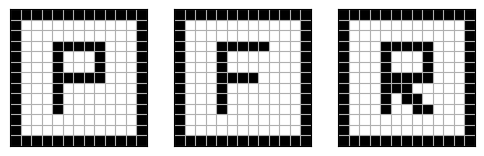

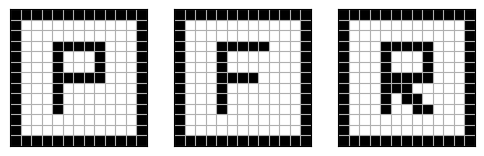

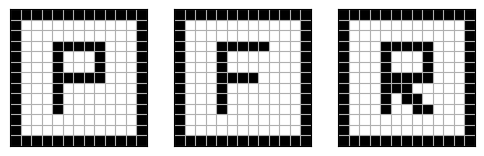

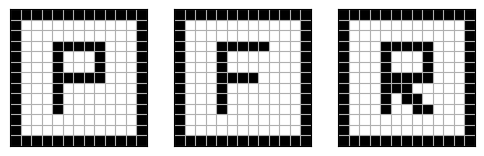

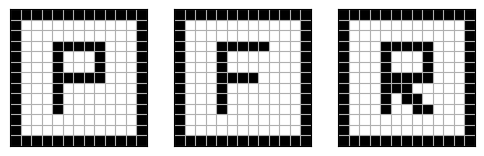

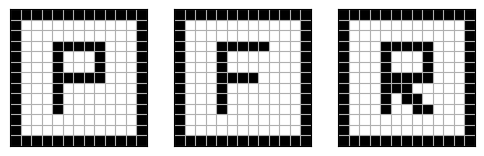

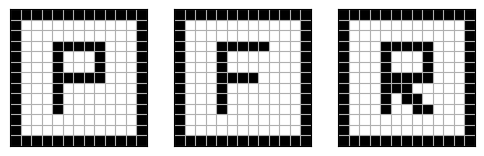

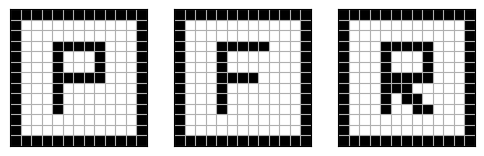

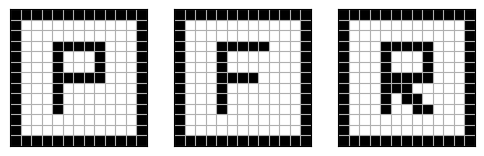

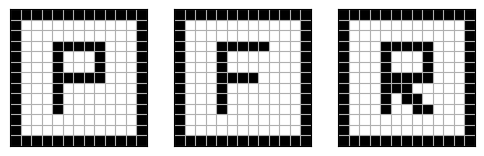

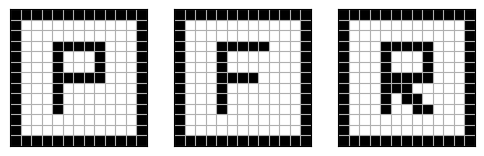

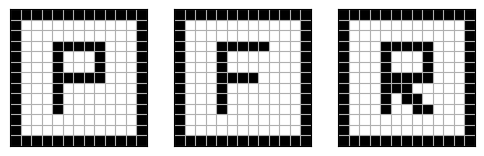

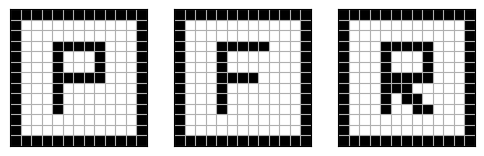

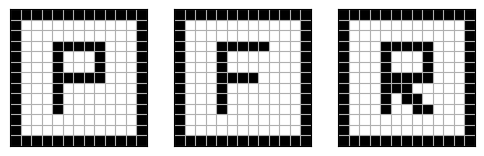

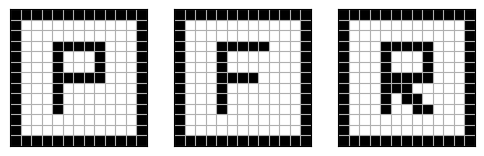

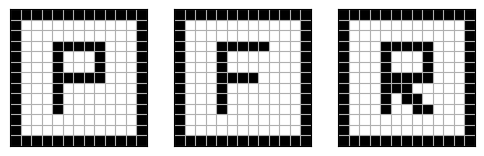

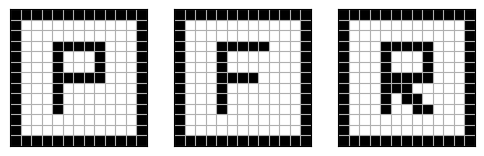

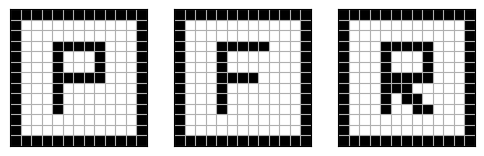

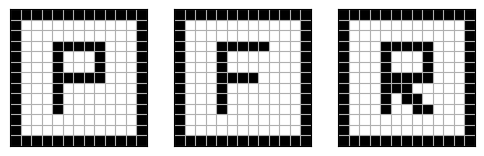

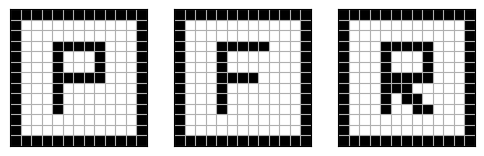

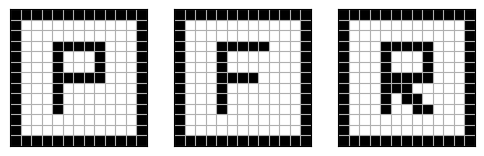

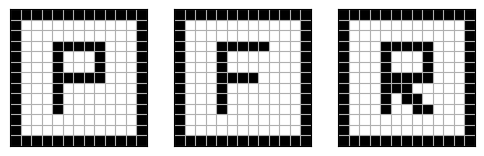

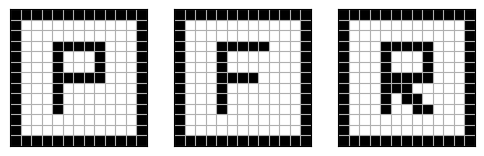

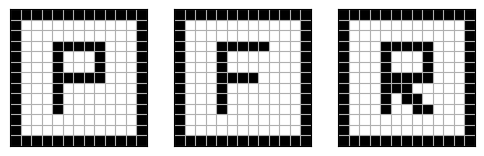

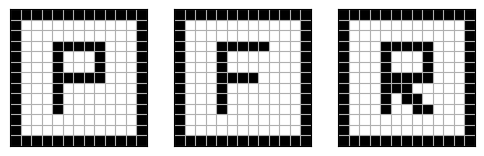

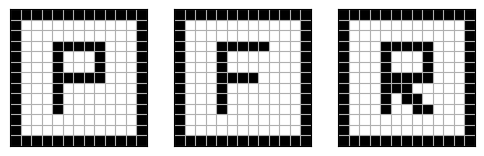

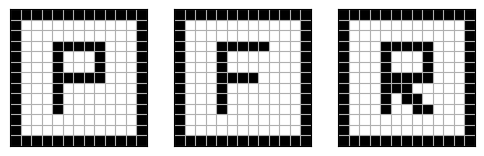

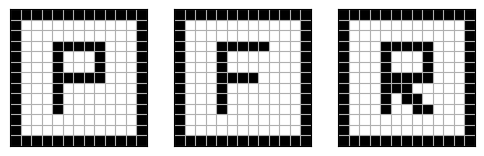

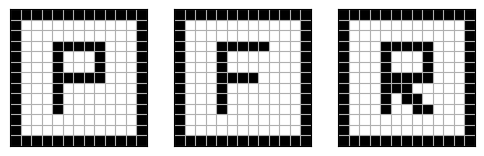

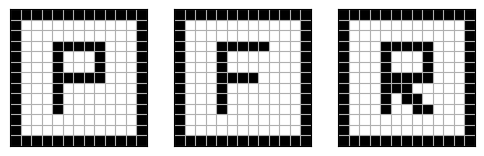

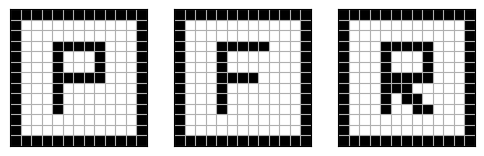

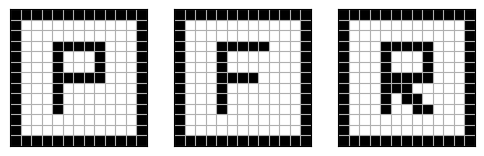

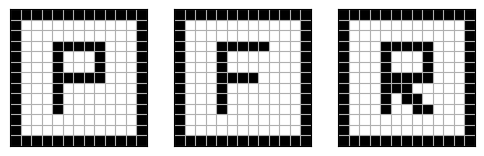

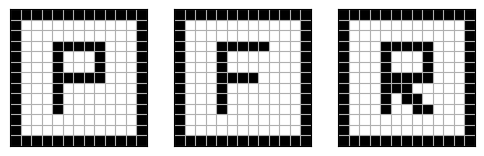

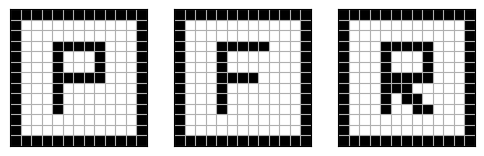

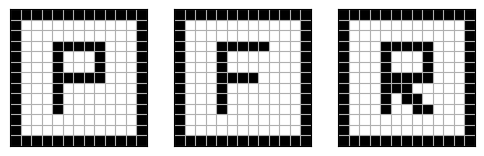

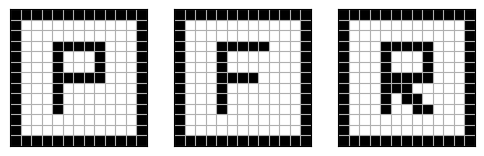

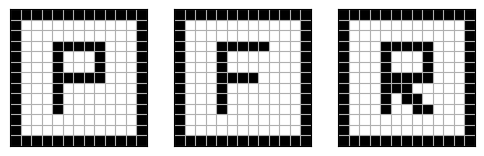

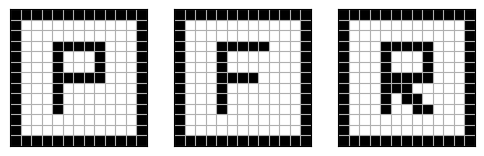

In [9]:
from tqdm.notebook import tqdm
for label, design in tqdm(results.best()):
    display(design.projections_fig())

In [4]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

# Playing with vector projections

In [209]:
origin = np.array([-20, 5., 5.])
far_pt = np.array([13., 1., 1.])
near_pt = np.array([0., 1., 1.])

In [210]:
rel_far_pt = far_pt - origin
rel_near_pt = near_pt - origin
norm_rel_far_pt = rel_far_pt / np.linalg.norm(rel_far_pt)
rel_proj = np.dot(rel_near_pt, norm_rel_far_pt) * norm_rel_far_pt
final = origin + rel_proj

In [211]:
print(origin)
print(far_pt, rel_far_pt, norm_rel_far_pt)
print(near_pt, rel_near_pt)
print(rel_proj, final)

[-20.   5.   5.]
[13.  1.  1.] [33. -4. -4.] [ 0.98562369 -0.11946954 -0.11946954]
[0. 1. 1.] [20. -4. -4.]
[20.37109723 -2.46922391 -2.46922391] [0.37109723 2.53077609 2.53077609]


In [222]:
def project_point(pt, projection_pt, origin_pt):
    proj_vec = projection_pt - origin_pt
    proj_vec = proj_vec / np.linalg.norm(proj_vec)
    return origin_pt + np.dot(pt - origin_pt, proj_vec) * proj_vec

In [224]:
project_point(near_pt, far_pt, [-20, 1., 1.])

array([0., 1., 1.])

In [225]:
project_point(near_pt, far_pt, [-20, 5., 5.])

array([0.37109723, 2.53077609, 2.53077609])

In [226]:
project_point(near_pt, far_pt, [-200, 5., 5.])

array([0.00916279, 1.24395938, 1.24395938])

In [227]:
project_point(near_pt, far_pt, [-2000, 5., 5.])

array([1.02660258e-04, 1.02583189e+00, 1.02583189e+00])